# 41. 自然语言处理

## 41.1.常用包

## 41.2.包导入及设置

In [3]:
import pynlpir as pynlpir

In [4]:
import numpy as np   
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [5]:
% matplotlib inline

In [6]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r'c:\windows\fonts\simhei.ttf', size=15) 

## 41.3.数据读入

In [7]:
text=open('CCTVSpringFestvialGala/2017.txt', 'r').read().replace('\n','')
text[:150]    

'主持人：中国中央电视台！主持人：中国中央电视台！主持人：此刻我们在北京中央电视台一号演播大厅向全球现场直播《2017年春节联欢晚会》。主持人：春回大地百花艳，节至人间万象新，一年一度的春节联欢晚会又一次如约而至。主持人：连续举办34年的央视春晚，已经成为伴随13亿中华儿女和全球华人辞旧迎新的新年俗。'

## 41.4.分词处理

In [8]:
pynlpir.open()

In [9]:
pynlpir.segment(text,pos_names='parent',pos_english=False)[:20]

part of speech not recognized: 'gtqg'
part of speech not recognized: 'gtqg'
part of speech not recognized: 'gtqg'
part of speech not recognized: 'gtqg'
part of speech not recognized: 'grqg'
part of speech not recognized: 'grqg'
part of speech not recognized: 'gwz'
part of speech not recognized: 'gwz'
part of speech not recognized: 'gwz'
part of speech not recognized: 'gtqg'
part of speech not recognized: 'gtqg'


[('主持人', '名词'),
 ('：', '标点符号'),
 ('中国', '名词'),
 ('中央电视台', None),
 ('！', '标点符号'),
 ('主持人', '名词'),
 ('：', '标点符号'),
 ('中国', '名词'),
 ('中央电视台', None),
 ('！', '标点符号'),
 ('主持人', '名词'),
 ('：', '标点符号'),
 ('此刻', '代词'),
 ('我们', '代词'),
 ('在', '介词'),
 ('北京', '名词'),
 ('中央电视台', None),
 ('一', '数词'),
 ('号', '量词'),
 ('演播', '动词')]

## 41.5.自定义词汇

In [10]:
pynlpir.nlpir.AddUserWord('央视'.encode('utf8'),'noun')
pynlpir.nlpir.AddUserWord('主持人：'.encode('utf8'),'noun')
pynlpir.nlpir.AddUserWord('观众朋友们'.encode('utf8'),'noun')
pynlpir.nlpir.AddUserWord('春联'.encode('utf8'),'noun')
pynlpir.nlpir.AddUserWord('一号演播大厅'.encode('utf8'),'noun')
pynlpir.nlpir.AddUserWord('综合频道'.encode('utf8'),'noun')
pynlpir.nlpir.AddUserWord('综艺频道'.encode('utf8'),'noun')
pynlpir.nlpir.AddUserWord('中文国际频道'.encode('utf8'),'noun')
pynlpir.nlpir.AddUserWord('军事农业频道'.encode('utf8'),'noun')
pynlpir.nlpir.AddUserWord('少儿频道'.encode('utf8'),'noun')
    

1

In [11]:
pynlpir.segment(text,pos_names='parent',pos_english=False)[:20]


part of speech not recognized: 'gtqg'
part of speech not recognized: 'gtqg'
part of speech not recognized: 'gtqg'
part of speech not recognized: 'gtqg'
part of speech not recognized: 'grqg'
part of speech not recognized: 'grqg'
part of speech not recognized: 'gwz'
part of speech not recognized: 'gwz'
part of speech not recognized: 'gwz'
part of speech not recognized: 'gtqg'
part of speech not recognized: 'gtqg'


[('主持人：', '名词'),
 ('中国', '名词'),
 ('中央电视台', None),
 ('！', '标点符号'),
 ('主持人：', '名词'),
 ('中国', '名词'),
 ('中央电视台', None),
 ('！', '标点符号'),
 ('主持人：', '名词'),
 ('此刻', '代词'),
 ('我们', '代词'),
 ('在', '介词'),
 ('北京', '名词'),
 ('中央电视台', None),
 ('一号演播大厅', '名词'),
 ('向', '介词'),
 ('全球', '名词'),
 ('现场', '处所词'),
 ('直播', '动词'),
 ('《', '标点符号')]

In [12]:
words = []
year=2017
year_words = []
year_words.extend(pynlpir.segment(text,pos_names='parent',pos_english=False))
  
for j in range(len(year_words)):
    ls_year_words=list(year_words[j])
    ls_year_words.append(year)
    words.append(ls_year_words)
 
words[2:13]

part of speech not recognized: 'gtqg'
part of speech not recognized: 'gtqg'
part of speech not recognized: 'gtqg'
part of speech not recognized: 'gtqg'
part of speech not recognized: 'grqg'
part of speech not recognized: 'grqg'
part of speech not recognized: 'gwz'
part of speech not recognized: 'gwz'
part of speech not recognized: 'gwz'
part of speech not recognized: 'gtqg'
part of speech not recognized: 'gtqg'


[['中央电视台', None, 2017],
 ['！', '标点符号', 2017],
 ['主持人：', '名词', 2017],
 ['中国', '名词', 2017],
 ['中央电视台', None, 2017],
 ['！', '标点符号', 2017],
 ['主持人：', '名词', 2017],
 ['此刻', '代词', 2017],
 ['我们', '代词', 2017],
 ['在', '介词', 2017],
 ['北京', '名词', 2017]]

In [13]:
df_words = pd.DataFrame(words,columns=["词汇","词性","年份"])
df_words.head(25)

,词汇,词性,年份
0,主持人：,名词,2017
1,中国,名词,2017
2,中央电视台,None,2017
3,！,标点符号,2017
4,主持人：,名词,2017
5,中国,名词,2017
6,中央电视台,None,2017
7,！,标点符号,2017
8,主持人：,名词,2017
9,此刻,代词,2017


In [14]:
df_words.index.size

6473

# 41.6.停用词处理

In [15]:
stopwords= open('CCTVSpringFestvialGala\stopwords.txt').read()
stopwords[:20]

'主持人:\n主持人：\n主持词\n(\n（\n？\n'

In [16]:
for i in range(df_words.shape[0]):
    if(df_words.词汇[i] in stopwords):
        df_words.drop(i,inplace=True)
  
    else:
        pass

In [17]:
df_words.head(15)

,词汇,词性,年份
1,中国,名词,2017
2,中央电视台,None,2017
5,中国,名词,2017
6,中央电视台,None,2017
9,此刻,代词,2017
10,我们,代词,2017
12,北京,名词,2017
13,中央电视台,None,2017
14,一号演播大厅,名词,2017
15,向,介词,2017


In [18]:
df_words.shape[0]

3976

# 41.7.词性分布分析

In [19]:
df_WordSpeechDistribution = pd.DataFrame(df_words['词性'].value_counts(ascending=False))

df_WordSpeechDistribution.head(10)

,词性
名词,1248
动词,963
代词,315
形容词,266
副词,213
量词,199
时间词,181
数词,180
介词,94
方位词,65


In [20]:
df_WordSpeechDistribution.rename(columns={'词性':'频数'},inplace=True)

df_WordSpeechDistribution.head()

,频数
名词,1248
动词,963
代词,315
形容词,266
副词,213


In [21]:
df_WordSpeechDistribution['频数'].sum()

3965

In [22]:
df_WordSpeechDistribution['百分比'] = df_WordSpeechDistribution['频数'] / df_WordSpeechDistribution['频数'].sum()
df_WordSpeechDistribution.head(10)

,频数,百分比
名词,1248,0.314754
动词,963,0.242875
代词,315,0.079445
形容词,266,0.067087
副词,213,0.053720
量词,199,0.050189
时间词,181,0.045649
数词,180,0.045397
介词,94,0.023707
方位词,65,0.016393


Text(0.5,1,'2017央视春晚主持人【主持词】词性分布分析')

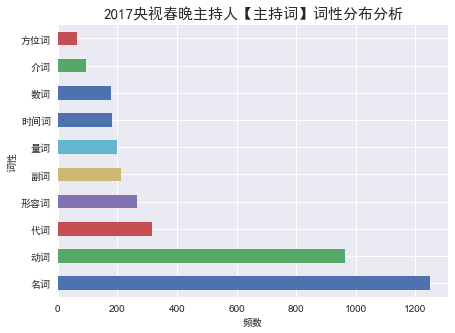

In [23]:
plt.subplots(figsize=(7,5))
df_WordSpeechDistribution.iloc[:10]['频数'].plot(kind='barh')
plt.yticks(fontproperties=font,size=10)
plt.xlabel('频数',fontproperties=font,size=10)
plt.ylabel('词性',fontproperties=font,size=10)
plt.title('2017央视春晚主持人【主持词】词性分布分析',fontproperties=font)

## 41.8.高频词分析

In [24]:
columns_slected=['动词','动词计数','名词','名词计数','代词','代词计数','助词','助词计数','副词','副词计数','形容词','形容词计数']

df_Top6 = pd.DataFrame(columns=columns_slected)

for i in range(0,12,2):
    df_Top6[columns_slected[i]] = df_words.loc[df_words['词性']==columns_slected[i]]['词汇'].value_counts().reset_index()['index']
    df_Top6[columns_slected[i+1]] = df_words.loc[df_words['词性']==columns_slected[i]]['词汇'].value_counts().reset_index()['词汇']

df_Top6.head(16)

,动词,动词计数,名词,名词计数,代词,代词计数,助词,助词计数,副词,副词计数,形容词,形容词计数
0,要,23,中国,27,我们,100.0,着,16.0,不,22.0,好,23.0
1,到,22,福,27,我,34.0,过,12.0,最,13.0,新,19.0
2,请,20,朋友,22,这,32.0,之,11.0,更,12.0,大,15.0
3,来,18,观众,18,大家,23.0,得,10.0,就,11.0,老,11.0
4,看,14,航天员,17,你,16.0,地,5.0,还,9.0,幸运,11.0
5,说,14,观众朋友们,17,您,9.0,等,1.0,正,9.0,伟大,10.0
6,感谢,12,舟,14,此刻,8.0,连,1.0,将,8.0,欢乐,9.0
7,带,11,全国,14,每,7.0,NaN,NaN,再,8.0,美好,6.0
8,会,10,字,14,这里,7.0,NaN,NaN,正在,7.0,深,5.0
9,过年,9,神,14,各族,7.0,NaN,NaN,又,7.0,小,4.0


## 41.8 词频统计

In [25]:
df_words.head()

,词汇,词性,年份
1,中国,名词,2017
2,中央电视台,None,2017
5,中国,名词,2017
6,中央电视台,None,2017
9,此刻,代词,2017


In [26]:
df_AnnaulWords=df_words[["年份","词汇"]].pivot(columns="年份", values="词汇")
df_AnnaulWords.head()

年份,2017
1,中国
2,中央电视台
5,中国
6,中央电视台
9,此刻


In [27]:
df_AnnaulWords.fillna(0,inplace=True)
  
df_AnnaulWords.head()

年份,2017
1,中国
2,中央电视台
5,中国
6,中央电视台
9,此刻


In [28]:
df_AnnualTopWords=pd.DataFrame(columns=[2017])
df_AnnualTopWords[2017]=df_AnnaulWords[2017].value_counts().reset_index()["index"]
df_AnnualTopWords[1:].head(20)

,2017
1,我
2,春
3,这
4,们
5,年
6,福
7,中国
8,来
9,大家
10,好


## 41.10 关键词分析

In [29]:
df_annual_keywords = pd.DataFrame(columns=[2017])
df_annual_keywords[2017]=pynlpir.get_key_words(' '.join(df_AnnualTopWords[2017].astype('str')))
df_annual_keywords.head(10)    

,2017
0,杨利伟
1,姜昆
2,@春晚
3,中国
4,世界
5,人心
6,观众朋友们
7,央视
8,传祺
9,央视网


## 41.11. 生成词云

In [30]:
from wordcloud import WordCloud,ImageColorGenerator
from imageio import imread

font_wc= r'C:\Windows\Fonts\msyhbd.ttc'

In [31]:
myText=' '.join(df_words.词汇)
myText[:20]

'中国 中央电视台 中国 中央电视台 此刻'

In [32]:
bg_pic = imread('CCTVSpringFestvialGala/host2.jpg')
wc = WordCloud(font_path=font_wc, mask=bg_pic,max_words=500,max_font_size=200,
               background_color='white',colormap= 'Reds_r',scale=15.5)

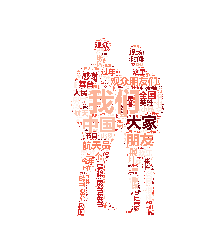

In [33]:
wc.generate(myText)
plt.imshow(wc)
plt.axis('off')

In [34]:
wc.to_file('CCTVoutput/chun.jpg')

In [35]:
pynlpir.close()